In [1]:
import requests
import json
response = requests.get('http://db-binding-rest.vstestt2.svc.cluster.local:8080')
response.json()

{'status': 'ok ver1.1'}

In [2]:
import requests
import json
response = requests.post('http://db-binding-rest.vstestt2.svc.cluster.local:8080/dbbind', '{"data":"teststring"}')
jresponse = response.json()

In [3]:
!pip install psycopg2

     |████████████████████████████████| 380 kB 29.7 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for psycopg2: filename=psycopg2-2.9.3-cp38-cp38-linux_x86_64.whl size=554153 sha256=da758bf8302b0e8cd83ed32f0647fbf04cd09b56589aaeb28aa3bb4af743d9a4
  Stored in directory: /tmp/pip-ephem-wheel-cache-0yn0chz6/wheels/f3/dc/e2/b8e0e2142eff7fd680295ecd2d92e3bfbb90195523e43da161
Successfully built psycopg2


In [4]:
import psycopg2
import psycopg2.errorcodes
import time
import logging
import random
db_connection = psycopg2.connect(database=jresponse['database'], \
    user=jresponse['user'], \
    password=jresponse['password'], \
    host=jresponse['host'], \
    port=jresponse['port'])
print(db_connection)

<connection object at 0x7f4e10099040; dsn: 'user=postgres password=xxx dbname=postgres host=p.ijkdpdsaqzhgzeleiv4ousk5hi.db.postgresbridge.com port=5432', closed: 0>


In [6]:
import pandas as pd
cur = db_connection.cursor()
cur.execute("SELECT * FROM bluebook_small")
logging.debug("select_all(): status message: {}".format(cur.statusmessage))
df = pd.DataFrame(cur.fetchall(), columns = ['Price','Mileage','Make','Model','Trim','Type','Cylinder','Liter','Doors','Cruise','Sound','Leather'])
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [7]:
import seaborn as sns
import csv
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import zipfile
from IPython.display import display, Latex, Markdown
import plotly.express as px
import plotly.graph_objs as go
plt.rcParams['font.sans-serif'] = "Comic Sans MS"
import warnings; warnings.simplefilter('ignore')
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

In [8]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder()
df['Make']= le.fit_transform(df['Make']) 
df['Model']= le.fit_transform(df['Model']) 
df['Trim']= le.fit_transform(df['Trim']) 
df['Type']= le.fit_transform(df['Type'])
df

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,0,10,44,3,6,3.1,4,1,1,1
1,17542.03608,9135,0,10,44,3,6,3.1,4,1,1,0
2,16218.84786,13196,0,10,44,3,6,3.1,4,1,1,0
3,16336.91314,16342,0,10,44,3,6,3.1,4,1,0,0
4,16339.17032,19832,0,10,44,3,6,3.1,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
799,16507.07027,16229,5,21,21,3,6,3,4,1,0,0
800,16175.9576,19095,5,21,21,3,6,3,4,1,1,0
801,15731.1329,20484,5,21,21,3,6,3,4,1,1,0
802,15118.89323,25979,5,21,21,3,6,3,4,1,1,0


In [9]:
X = df.drop('Price', 1)
X = X.apply(pd.to_numeric)
y = df['Price']
y = y.apply(pd.to_numeric)

In [11]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X[['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']] = scale.fit_transform(X[['Mileage', 'Make', 'Model', 'Trim', 'Type', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']].values)

In [12]:
X

,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,-1.417485,-1.802394,-0.556062,1.203142,0.498507,0.52741,0.056736,0.556279,0.57352,0.687406,0.617611
1,-1.305902,-1.802394,-0.556062,1.203142,0.498507,0.52741,0.056736,0.556279,0.57352,0.687406,-1.619142
2,-0.810128,-1.802394,-0.556062,1.203142,0.498507,0.52741,0.056736,0.556279,0.57352,0.687406,-1.619142
3,-0.426058,-1.802394,-0.556062,1.203142,0.498507,0.52741,0.056736,0.556279,0.57352,-1.454744,-1.619142
4,0.000008,-1.802394,-0.556062,1.203142,0.498507,0.52741,0.056736,0.556279,0.57352,-1.454744,0.617611
...,...,...,...,...,...,...,...,...,...,...,...
799,-0.439853,1.959613,0.708158,-0.396779,0.498507,0.52741,-0.033772,0.556279,0.57352,-1.454744,-1.619142
800,-0.089966,1.959613,0.708158,-0.396779,0.498507,0.52741,-0.033772,0.556279,0.57352,0.687406,-1.619142
801,0.079605,1.959613,0.708158,-0.396779,0.498507,0.52741,-0.033772,0.556279,0.57352,0.687406,-1.619142
802,0.750446,1.959613,0.708158,-0.396779,0.498507,0.52741,-0.033772,0.556279,0.57352,0.687406,-1.619142


In this example, we are using sklearn’s feature selection library and choosing a Decision Tree Regressor estimator for RFE. The reason why we are using regressors over classifiers is that we do not have a multi-class problem here; since we are predicting the price of cars based on its characteristics, we are minimizing the loss in the arbitrary loss function chosen to find the most suitable and optimizable model for this data science question. As standard practice suggests, we have randomly kept aside 20% of the data as “unseen” test data, and are using the remaining 80% as training data to test various machine learning approaches.

In [13]:
# evaluate RFE for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

# create pipeline
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

MAE: -903.890 (299.065)


There are many loss functions one can choose for evaluating regressor models. The reason why I have chosen mean absolute error is that there is no difference between overestimating and underestimating the price of a car; we are simply seeing how different the delta is between the predicted and actual price of the car. The MAE of RFE comes to ~903.

In [14]:
feature_name = X.columns.tolist()
num_feats = len(feature_name)

Now we fit the pipeline on all the training data and then use the predict() function to make predictions on the test data. Also, we are able to see which features have been selected and which one rejected. 

In [15]:
# create pipeline
from sklearn.model_selection import train_test_split
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# fit the model on all available data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
pipeline.fit(X_train, y_train)
yhat = pipeline.predict(X_test)
#print(yhat)
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, %s, Selected %s, Rank: %.3f' % (i, feature_name[i], rfe.support_[i], rfe.ranking_[i]))
print("PREDICTED VALUE\n", pd.DataFrame(data=yhat[:20]), "\nTEST VALUE\n", y_test[:20])

Column: 0, Mileage, Selected True, Rank: 1.000
Column: 1, Make, Selected True, Rank: 1.000
Column: 2, Model, Selected True, Rank: 1.000
Column: 3, Trim, Selected True, Rank: 1.000
Column: 4, Type, Selected False, Rank: 2.000
Column: 5, Cylinder, Selected False, Rank: 6.000
Column: 6, Liter, Selected True, Rank: 1.000
Column: 7, Doors, Selected False, Rank: 5.000
Column: 8, Cruise, Selected False, Rank: 7.000
Column: 9, Sound, Selected False, Rank: 3.000
Column: 10, Leather, Selected False, Rank: 4.000
PREDICTED VALUE
               0
0   15048.04218
1   16644.08787
2   15589.78048
3   44205.87588
4   12425.38917
5   27060.13756
6   15086.89959
7   27788.81324
8   30661.26015
9   38208.50102
10  13825.15471
11  20537.14172
12  19344.16554
13  33183.33260
14  27280.98206
15  16644.08787
16  25148.37919
17  23102.02237
18  20537.14172
19  14909.05099 
TEST VALUE
 8      14862.09387
575    15979.01484
616    15802.65286
142    45061.95194
236    12630.77503
664    25618.28188
608    15174.

Above, we can see the results of RFE, in which 5 features are chosen: mileage, make, model, trim, and liter.

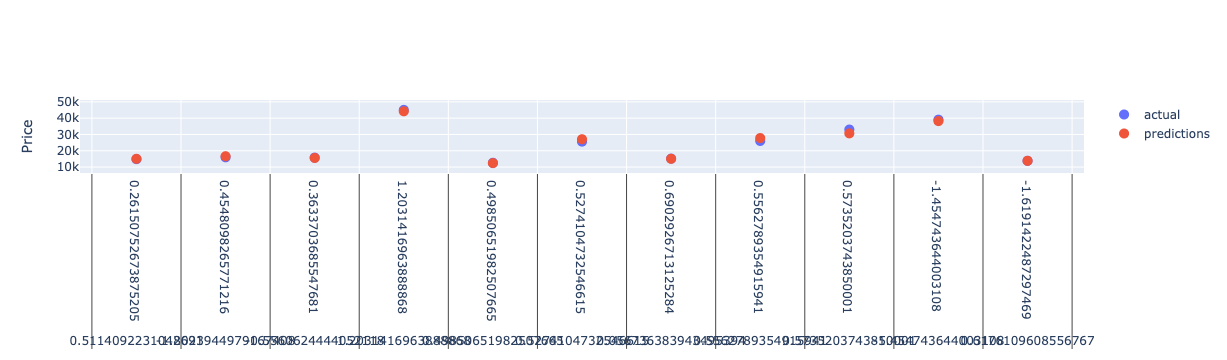

In [17]:
fig = go.Figure()
count = 20
fig.add_trace(go.Scatter(x = X_test[:count], y = y_test[:count], mode = 'markers', name = 'actual', marker=dict(size=10,color=1)))
fig.add_trace(go.Scatter(x = X_test[:count], y = yhat[:count], mode = 'markers', name = 'predictions', marker=dict(size=10,color=3)))
fig.update_layout( yaxis_title = 'Price')